## Tutorial: Template matching and HOG

==============================================================================================
## Descriptors extraction for object detection, based on template matching and HOG
==============================================================================================

In this tutorial we focus on the following main topics:

1) Template matching
   
2) Image Descriptors: "Sliding window" and HOG image descriptor    


# 1) Template matching

The match_template function from scikit-image uses fast, normalized cross-correlation [1] to find instances of the template in the image. Note that the peaks in the output of match_template correspond to the origin (i.e. top-left corner) of the template.

[1] J. P. Lewis, “Fast Normalized Cross-Correlation”, Industrial Light and Magic.

See an example by an [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import match_template

from skimage import io
from skimage.color import rgb2gray, rgba2rgb

/home/pau/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [3]:
#visualize
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


First exercise will claim to recognize a letter among letters of different fonts. For this purpose, let us read the image `lettersA.gif`

(250, 400)


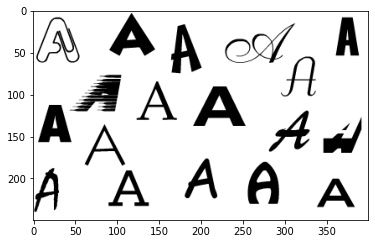

In [4]:
# Load image
image = io.imread('./images/lettersA.gif')
plt.imshow(image, cmap='gray')
print(image.shape)

Let's read an image "A.png" that will be the query image that is the template to look among the different letters above.

(58, 60)


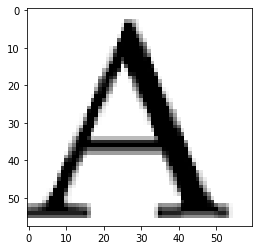

In [5]:
# Load template
imgA = io.imread('./images/A.png')
imgA = rgb2gray(rgba2rgb(imgA))  
print(imgA.shape)
plt.imshow(imgA, cmap='gray')

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

The dimensions of the image are:  (250, 400)
The dimensions of the template are:  (58, 60)


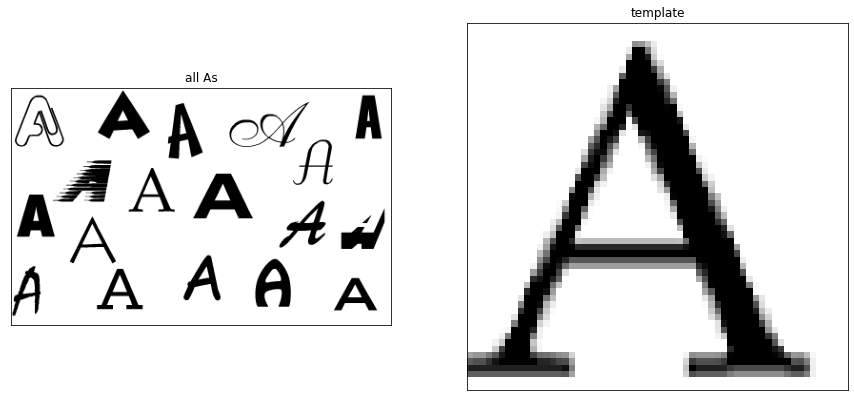

In [10]:
visualize2(image, imgA, 'all As', 'template')

print('The dimensions of the image are: ', image.shape)
print('The dimensions of the template are: ', imgA.shape)
# print(imgA.max())
# print(imgA.min())

The command [match_template()](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html) allows to match template using normalized cross-correlation. Check what is the output of it.

[-0.27941111 -0.27923872 -0.27892727 ...  0.73384647  0.74748882
  0.75350815]
Minimum NCC:  -0.2794111064396448
Maximum NCC:  0.753508145338724


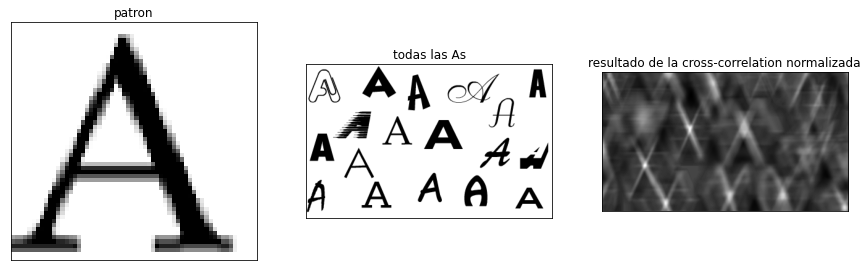

In [11]:
result = match_template(image, imgA) # Uses normalized cross-correlation

print(np.unique(result))
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max()) #why are we interested in the min and max?

visualize3(imgA, image, result, 'patron', 'todas las As', 'resultado de la cross-correlation normalizada')

 Let's take the position in the image of the maximum response:

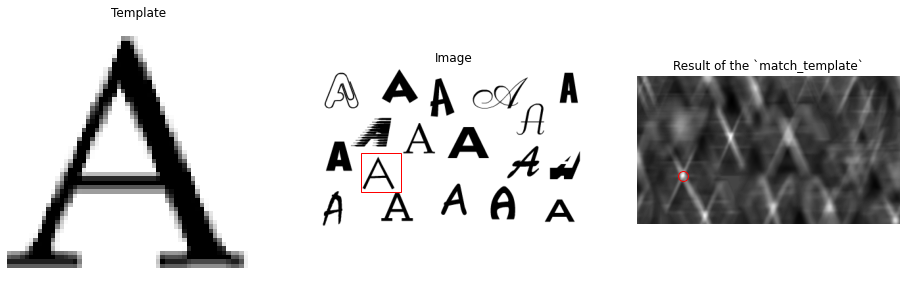

In [12]:
def tm_results(result,imgTemp, image): 
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    #visualize it
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)

    ax1.imshow(imgTemp, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Image')
    
    # highlight matched region
    himg, wimg = imgA.shape
    rect = plt.Rectangle((x, y), wimg, himg, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3.imshow(result, cmap='gray')
    ax3.set_axis_off()
    ax3.set_title('Result of the `match_template`')
    
    # highlight matched region
    ax3.autoscale(False)
    ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

    plt.show()


tm_results(result, imgA, image)

**Exercise:** Interpret the image of the right, result of match_template function.

**Exercise:** Add the second and third occurance of A.

**Exercise:** Think about the previous results and write your conclusions. 

Now, let's see what happens if we consider the same image but rotated.

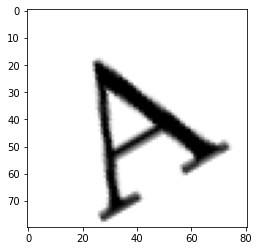

In [14]:
from skimage.transform import rotate

imgA_rot=rotate(imgA, 30, resize=True, cval=1)
plt.imshow(imgA_rot, cmap='gray')

The dimensions of the template are:  (80, 81)
Minimum NCC:  -0.21732516497106436
Maximum NCC:  0.39022077835267327


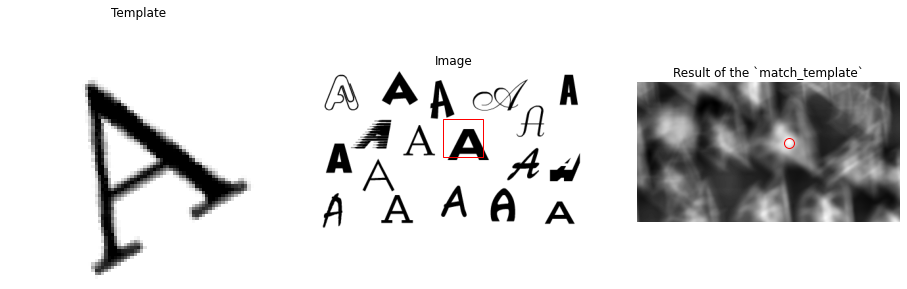

In [16]:
result = match_template(image, imgA_rot) # Uses normalized cross-correlation

print('The dimensions of the template are: ', imgA_rot.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max()) #why are we interested in the min and max?

tm_results(result, imgA_rot, image)

Check how the correlation value changed!

The dimensions of the template are:  (58, 60)
Minimum NCC:  -0.23963037634720016
Maximum NCC:  0.39969104819938117


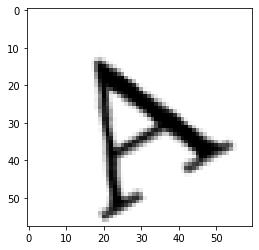

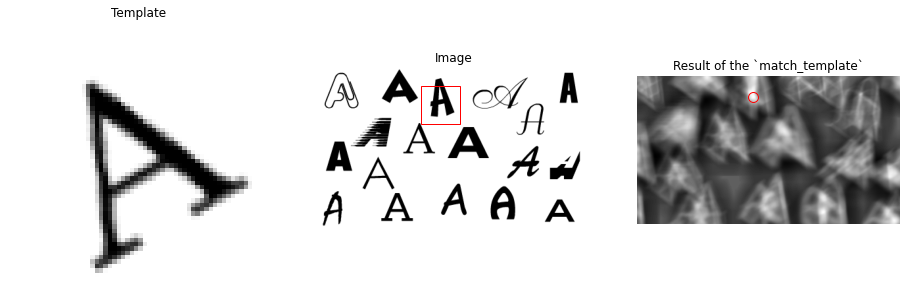

In [18]:
from skimage.transform import resize

imgA_rot=resize(imgA_rot,(58,60))
plt.imshow(imgA_rot, cmap='gray')

result = match_template(image, imgA_rot) # Uses normalized cross-correlation

print('The dimensions of the template are: ', imgA_rot.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max()) #why are we interested in the min and max?

tm_results(result, imgA_rot, image)

**Exercise:** Think about the previous results and write your conclusions. 

Use a new letter as a template:

The dimensions of the template are:  (68, 91)
Minimum NCC:  -0.30977357999593086
Maximum NCC:  0.4411262392488106


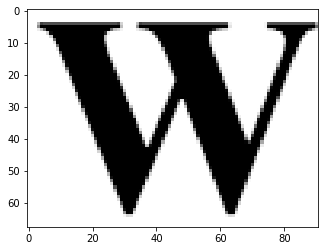

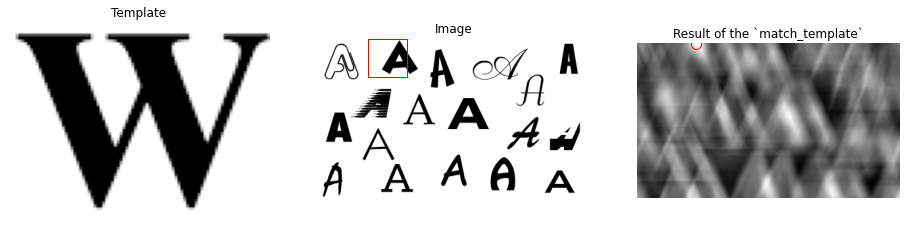

In [21]:
# Load template
imgW = rgb2gray(rgba2rgb(io.imread('./images/W.png'))) 
plt.imshow(imgW, cmap='gray')

result = match_template(image, imgW)

print('The dimensions of the template are: ', imgW.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max()) #why are we interested in the min and max?

tm_results(result, imgW, image)

**Exercise:** Think about the previous results. What are your conclusions now?

Let's now use another image.

The dimensions of the image are:  (576, 864)
The dimensions of the template are:  (58, 60)
Minimum NCC:  -0.35547944039597534
Maximum NCC:  0.7124451359815448


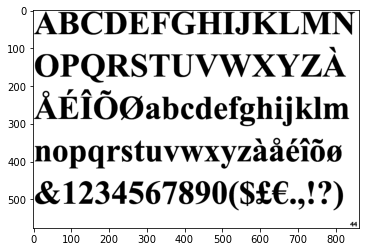

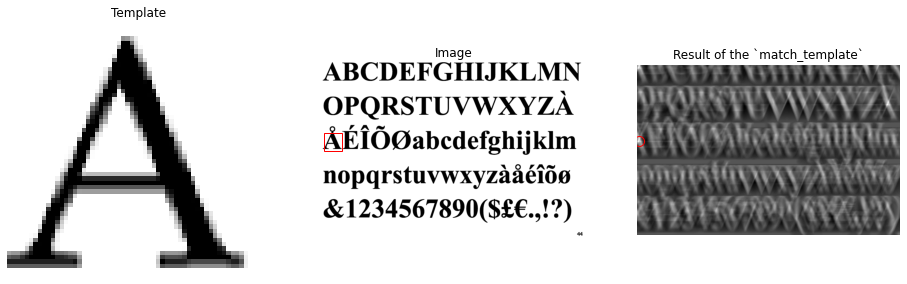

In [23]:
# Load a new image
from skimage.color import rgba2rgb

image = io.imread('./images/text.gif')
image = rgb2gray(rgba2rgb(image))
plt.imshow(image, cmap='gray')

result = match_template(image, imgA)

print('The dimensions of the image are: ', image.shape)
print('The dimensions of the template are: ', imgA.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max())

tm_results(result, imgA, image)

Let's see what happen with a new contrast.

The dimensions of the image are:  (576, 864)
The dimensions of the template are:  (58, 60)
Minimum NCC:  -0.34752825920367314
Maximum NCC:  0.7112462793319319


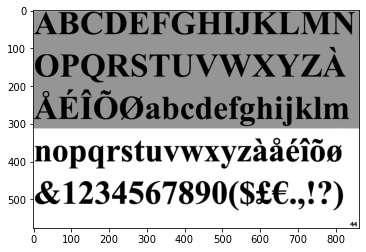

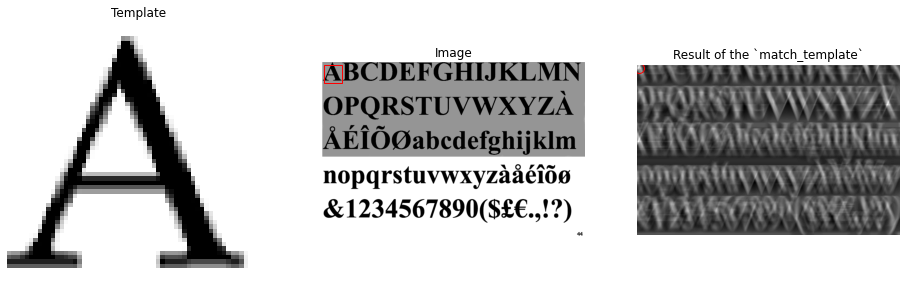

In [25]:
# Load a new image
image = io.imread('./images/text2.gif')
image = rgb2gray(rgba2rgb(image))
plt.imshow(image, cmap='gray')

result = match_template(image, imgA)

print('The dimensions of the image are: ', image.shape)
print('The dimensions of the template are: ', imgA.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max())

tm_results(result, imgA, image)

Change the contrast of imgA

The dimensions of the image are:  (576, 864)
The dimensions of the template are:  (58, 60)
Minimum NCC:  -0.34752825920367314
Maximum NCC:  0.7112462793319319


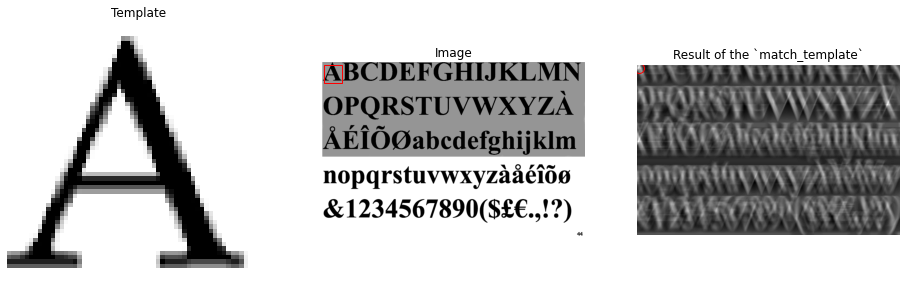

In [26]:
result = match_template(image, imgA/2) 

print('The dimensions of the image are: ', image.shape)
print('The dimensions of the template are: ', imgA.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max())

tm_results(result, imgA/2, image)


**Exercise:** Think about the previous results and write your conclusions. 

**Exercise:** Change the size of imgA

The dimensions of the image are:  (576, 864)
The dimensions of the template are:  (58, 60)
Minimum NCC:  -0.6669623736132674
Maximum NCC:  0.6502513572564901


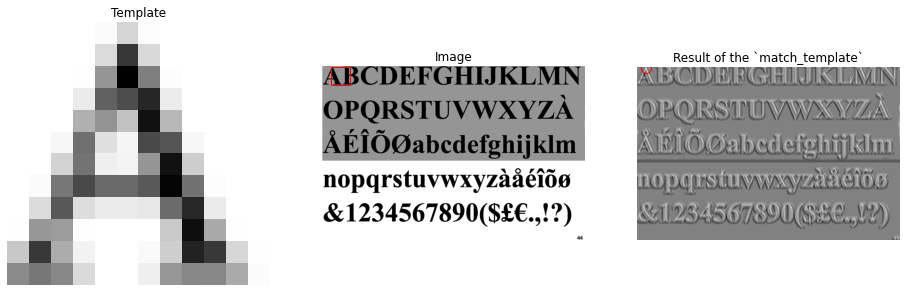

In [28]:
from skimage.transform import rescale

imgA2=rescale(imgA,.2)
result = match_template(image, imgA2)

print('The dimensions of the image are: ', image.shape)
print('The dimensions of the template are: ', imgA.shape)
print('Minimum NCC: ',result.min())
print('Maximum NCC: ',result.max())

tm_results(result, imgA2, image)

# 2) Histogram of Oriented Gradients


The [Histogram of Oriented Gradients (HOG)](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) feature descriptor is classical image descriptor for object detection.

Check:
- a) what is it about, and
- b) how to construct it.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique.

Read the car template ('car_template.png'), obtain its HOG descriptor and visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

The HOG detector function is in the skimage.feature library. 

The dimensions of the template are:  (40, 100)


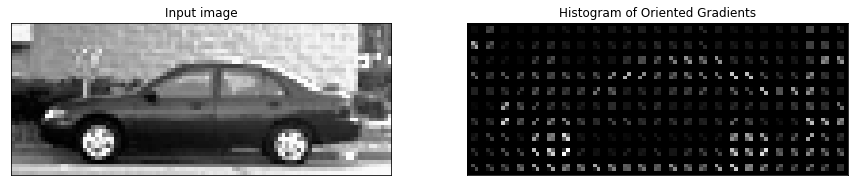

In [29]:
from skimage.feature import hog

#Reading, computing and visualizing the car example
car=io.imread('./images/car_template.png')
print('The dimensions of the template are: ', car.shape)

hcar, wcar = car.shape

fd_car, hog_car = hog(car, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

visualize2(car, hog_car, 'Input image', 'Histogram of Oriented Gradients')

In [30]:
print(len(fd_car))

6912


Now, let's apply the HOG descriptor on `test-1.pgm`.

We read the image, from the folder "car", and obtain the HOG descriptor to compare with the descriptor of the template. 

In order to accelerate the algorithm execution, we can apply a sliding window with a step of X pixels both vertically and horizontally (e.g. X=5).


In [31]:
# Complete the code below:

import numpy as np

def visualize_cars(car,im,im_result,pos_x,pos_y,wcar, hcar):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('car template')
        ax1.imshow(car, cmap='gray')
        ax2.set_title('best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('HOG distances')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()
        

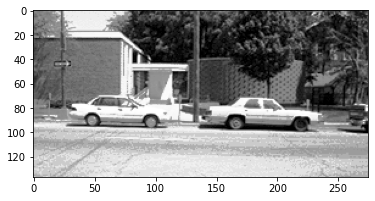

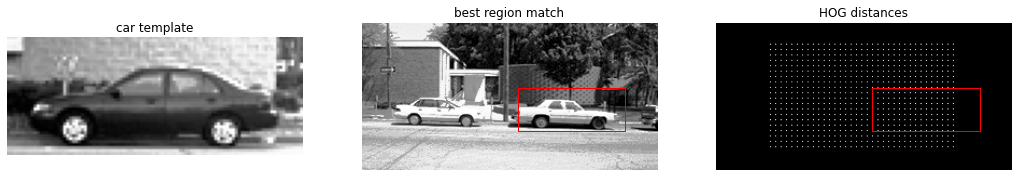

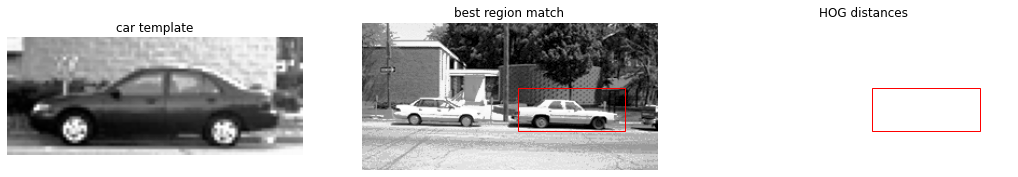

In [32]:
#Computing the similarity between the car template and all the regions of the same size of the different car examples in the folder cars/
im=io.imread('./images/cars/test-1.pgm')
plt.imshow(im, cmap='gray')

im_result=np.zeros((im.shape))
im_result2=np.ones((im.shape))*np.inf
(height,width)=im.shape

for i in range(0,height-hcar,5):
    for j in range(0,width-wcar,5):
        region = im[i:i+hcar, j:j+wcar]
        fd_region, hog_region = hog(region, orientations=8, pixels_per_cell=(4, 4), 
                                    cells_per_block=(2, 2), visualize=True)

        im_result[i+round(hcar/2),j+round(wcar/2)]=np.dot(fd_car,fd_region)
        im_result2[i+round(hcar/2),j+round(wcar/2)]=np.linalg.norm(fd_car-fd_region)
                      
ij = np.unravel_index(np.argmax(im_result), im_result.shape)
pos_x, pos_y = ij[::-1]
ij2 = np.unravel_index(np.argmin(im_result2), im_result.shape)
pos_x2, pos_y2 = ij2[::-1]
        
visualize_cars(car, im, im_result,  pos_x,  pos_y,  wcar, hcar)  
visualize_cars(car, im, im_result2, pos_x2, pos_y2, wcar, hcar)  





**Exercises:** Compare Template Matching and HOG on the same image.